# Stroke Prediction Dataset

### The Overfitters
Samitha Katipally, John Seimon, Surya Teja.

# INTRODUCTION

Strokes are a major cause of death and long-term disability worldwide, and understanding their risk factors is crucial for prevention and treatment. In this project, we’re working to predict the likelihood of a patient experiencing a stroke using data that includes details like age, gender, lifestyle habits, and medical history.

By looking at how these factors relate to stroke occurrences, we hope to identify which ones have the greatest impact. This knowledge could help healthcare providers detect strokes earlier and focus on prevention for people who are at higher risk.



## Research objective:
Which features in the dataset are most strongly associated with stroke occurrence?
What is the distribution of values in key numeric variables, and do they show any notable skewness or outliers?

## Overview:
This Stroke Prediction dataset includes information about people and some health and lifestyle factors that may be linked to their risk of having a stroke.

The dataset contains:
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not



* To get started, we’ll first import the necessary libraries and load the dataset.

## Loading dataset using Pandas:

In [ ]:
# Importing libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Reading the dataframe:

df= pd.read_csv("healthcare-dataset-stroke-data.csv")

#setting index
df.set_index("id", inplace=True)

df


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


## Target Variable:
Our target variable is "stroke" with the integer values 0 and 1, this indicates whether the patient has had a stroke (1) or not (0). This variable is already present in the dataset, so luckily, there's no coding required for creating any dummy variable. This variable will serve as an outcome or a dependent variable in predictive analysis.

[Text(0, 0, 'No Stroke'), Text(1, 0, 'Stroke')]

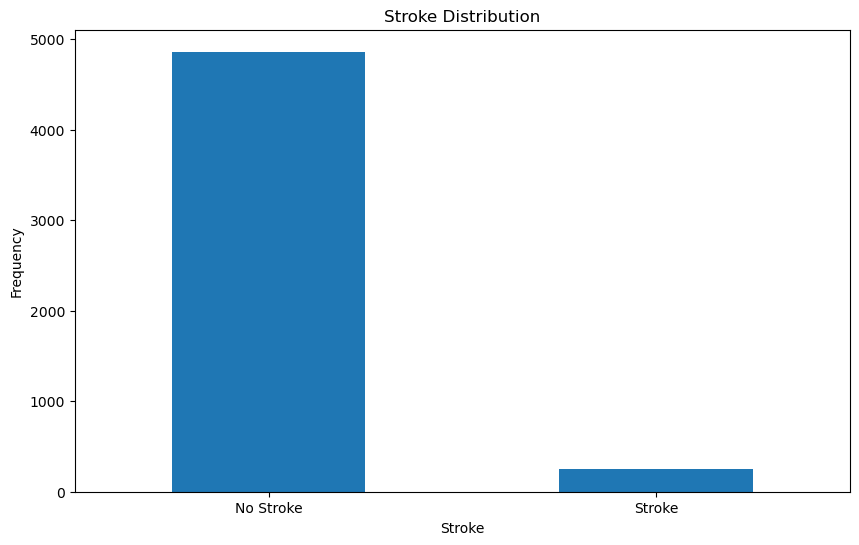

In [ ]:


# Plotting target variable
ax = df['stroke'].value_counts().plot(
    kind='bar',
    title='Stroke Distribution',
    xlabel='Stroke',
    ylabel='Frequency',
    figsize=(10, 6)
)

# Setting custom labels for the x-axis
ax.set_xticklabels(['No Stroke', 'Stroke'], rotation=0)

## Bar graph analysis:
The chart shows a strong bias within our dataset towards subjects that have not had strong. We do not find this bias to be problematic because it is an accurate reflection of the greater population.

## Feature Selection:
Feature Selection:
We have included every column/features that could potentially influence the likelihood of a stroke. All were present in the original dataset.

**Gender**

Data Type: Categorical

Range: "Male", "Female", "Other"

Justification: Gender played a role in stroke risk, with certain health factors varying between men and women. Including gender may help identify any gender-specific trends in stroke incidence.

**Age**

Data Type: Continuous

Range: 0-85

Justification: Age is a significant factor in stroke risk, with older individuals being at higher risk. Including age helps in understanding how stroke risk increases as a person gets older.

**Hypertension**

Data Type: Categorical (0 or 1)

Range: 0–1

Justification: Hypertension, or High blood pressure, is a well known risk factor for stroke.

**Heart Disease**

Data Type: Categorical (0 or 1)

Range: 0(no)–1(yes)

Justification: Individuals with heart disease often face an increased risk of stroke.

**Ever Married**

Data Type: Categorical

Range: "Yes", "No"

Justification: Marital status can affect health outcomes. Married individuals may have different health behaviors and access to healthcare compared to single individuals, which could influence stroke risk.

**Work Type**

Data Type: Categorical

Range: "Private", "Self-employed", "Govt_job", "children" and "Never_worked"

Justification: Different types of work can be associated with various stress levels, activity levels, and lifestyle factors, all of which may indirectly influence stroke risk.

**Residence Type**

Data Type: Categorical

Range: "Urban" and "Rural"

Justification: The type of residence can influence lifestyle, access to healthcare, and environmental factors, which may impact stroke risk. Rural and urban areas often have differing healthcare access and lifestyle characteristics that can affect health outcomes.

**Average Glucose Level**

Data Type: Float

Range: ~55–300 mg/dL

Justification: Elevated glucose levels can indicate diabetes, which is a known risk factor for stroke.

**BMI**

Data Type: Continuous

Range: 10-50+

Justification: BMI is a key indicator of obesity, which is a risk factor for stroke. Including BMI allows us to evaluate the relationship between body weight and stroke incidence.

**Smoking Status**

Data Type: Categorical

Range: "never smoked", "formerly smoked", "smokes"

Justification: Smoking is a risk factor that directly affects cardiovascular health, increasing stroke risk.

### Splitting our Dataframes

Here, we separate the dataset into numeric and categorical data. This makes it easier to work with each type, as they require different approaches for analysis in Python. It also helps us see what changes or adjustments are needed to find meaningful relationships between these data types

After converting hypertension, heart disease, and stroke to int32 they are automatically excluded from our numeric df and included in our categorical df.

In [ ]:
#command to specify that pandas recognizes 'hypertension' and 'heart disease' as dummy variables
# ^this ensures that they are exluded from numeric df and included in categorical df

df[['hypertension', 'heart_disease', 'stroke']] = df[['hypertension', 'heart_disease', 'stroke']].astype('int32')
# checking the data types for each column

df.dtypes

gender                object
age                  float64
hypertension           int32
heart_disease          int32
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int32
dtype: object

## Numeric Dataframe

In [ ]:
# Creating two filtered dataframes: 1. Numeric features:
# Creating a df for numeric variables

numeric_df = df.select_dtypes(include=['int64', 'float64'])

numeric_df

,age,avg_glucose_level,bmi
id,,,
9046,67.0,228.69,36.6
51676,61.0,202.21,NaN
31112,80.0,105.92,32.5
60182,49.0,171.23,34.4
1665,79.0,174.12,24.0
...,...,...,...
18234,80.0,83.75,NaN
44873,81.0,125.20,40.0
19723,35.0,82.99,30.6


## Categorical Dataframe

In the figure below you can see the effects of our one-hot encoding process where we turned each categorical value into a dummy variable and deleted one of the values to resolve the dummy variable trap. Before this step our categorical df as it did when we initially read in our entire dataframe (without our three numeric variables)

In [ ]:
# Creating a df of just categorical variables: 2. Categorical features:

cat_df = df.select_dtypes(include=['object', 'int32'])

cat_df

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
id,,,,,,,,
9046,Male,0,1,Yes,Private,Urban,formerly smoked,1
51676,Female,0,0,Yes,Self-employed,Rural,never smoked,1
31112,Male,0,1,Yes,Private,Rural,never smoked,1
60182,Female,0,0,Yes,Private,Urban,smokes,1
1665,Female,1,0,Yes,Self-employed,Rural,never smoked,1
...,...,...,...,...,...,...,...,...
18234,Female,1,0,Yes,Private,Urban,never smoked,0
44873,Female,0,0,Yes,Self-employed,Urban,never smoked,0
19723,Female,0,0,Yes,Self-employed,Rural,never smoked,0


## EDA Process for the numeric features:
In the EDA process for numeric features, We calculated descriptive statistics such as mean, median, minimum, maximum, quartiles, and 10th and 90th percentiles to understand general range and central tendencies. We assessed skewness and kurtosis to check for symmetry and “tailedness,” important for potential transformations. Finally, We plotted histograms for each feature to quickly identify unusual patterns, outliers or non-normal distributions.

In [ ]:
numeric_df.describe(percentiles=[.10,.25,.50,.75,.90])

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
10%,11.000000,65.789000,19.700000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
90%,75.000000,192.181000,38.900000
max,82.000000,271.740000,97.600000


## Reading the Tails and Peaks

Running quick analysis to find skewness and kurtosis helps us asses the distributions of our data through the normality of it's tails (skewness) and it's peak (kurtosis). We ran both of these methods on all of our features.

## Skewness for the numeric features:

In [ ]:
# Skewness

skewness = numeric_df.skew().round(2)

skewness

age                 -0.14
avg_glucose_level    1.57
bmi                  1.06
dtype: float64

## Kurtosis for the numeric features:

In [ ]:
# Kurtosis

kurtosis = numeric_df.kurtosis().round(2)

kurtosis

age                 -0.99
avg_glucose_level    1.68
bmi                  3.36
dtype: float64

## Histograms:

Histograms give us a way to visualize the distributions within each of our features. It was difficult for us to gain an understanding of each feature's spread until we saw them in box plot form. We recommend tweaking the bin number to play around with granularity; we chose 30 here because it balances readability with information- especially helpful given our spread with age.

We find them to be most useful when dealing with numerical features and pie charts, which we'll get into below, when looking at categorical features.

<Axes: title={'center': 'Distribution of Age'}, ylabel='Frequency'>

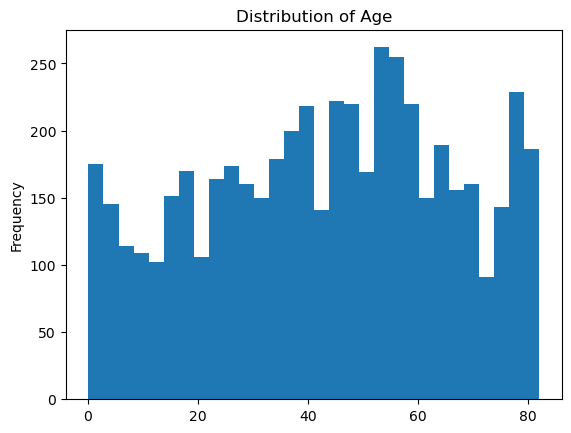

In [ ]:
df['age'].plot(kind='hist', bins=30, title='Distribution of Age')

<Axes: title={'center': 'Distribution of glucose'}, ylabel='Frequency'>

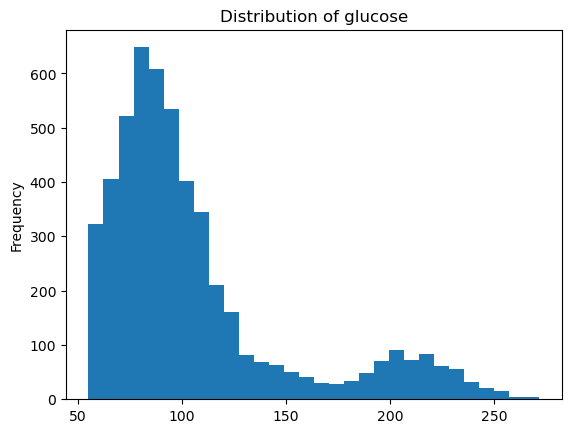

In [ ]:
df['avg_glucose_level'].plot(kind='hist', bins=30, title='Distribution of glucose')

<Axes: title={'center': 'Distribution of BMI'}, ylabel='Frequency'>

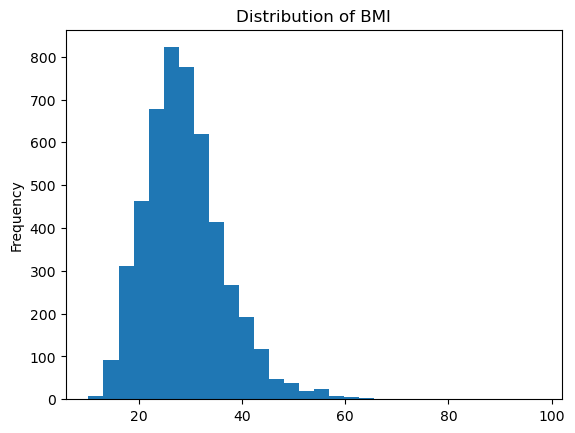

In [ ]:
df['bmi'].plot(kind='hist', bins=30, title='Distribution of BMI')

## Interpreting the Noteworthy Findings from Descriptive Statistics:
* The average age in the dataset is around 43, with a wide range of ages from almost zero to 82 years, showing a broad age spread. Age is nearly balanced but leans slightly toward younger individuals, as seen in its small negative skew (-0.14).

* Glucose levels vary a lot, with an average of 106 and some high values pushing the distribution to the right (right-skewed). This right-skew means a few people have high glucose levels, which indicates health risks.

* The average BMI is 28.89, but with some very high values (up to 97.6), making the distribution slightly right-skewed. This pattern suggests that while most people fall within a typical range, a few individuals have much higher BMIs.


* Glucose levels and BMI are also skewed to the right, with a few people having higher values that could be outliers or represent health risks. Age is more balanced when compared to other features, but it’s not perfectly symmetric.

## Comments on non-normal distributions:

The dataset shows skewed and non-normal distributions in variables like BMI and average glucose level. This suggests the presence of outliers such as extremely high glucose levels or BMI values, which could influence the analysis.

# EDA process for the categorical features:
In this EDA process for categorical features, we started by examining each feature’s unique values using "value_counts()". To visualize these distributions, we created a loop that generates bar charts for each categorical variable, where we can observe all available categorical features in our dataset. Ultimately, here we can see the spread and frequency of categories across multiple variables.

## Value counts for Categorical variables:
In pandas, we use the .value_counts() method to find the frequency of each category expressed as a percentage. Like our visualizations, this is a helpful for us to understand each value's relationship to its feature. Let's start by analyzing the our categorical columns:

In [ ]:
for column in cat_df:
    print(f"\nPercentage distribution for '{column}':\n{(cat_df[column].value_counts(normalize=True) * 100).round(2)}\n")



Percentage distribution for 'gender':
gender
Female    58.59
Male      41.39
Other      0.02
Name: proportion, dtype: float64


Percentage distribution for 'hypertension':
hypertension
0    90.25
1     9.75
Name: proportion, dtype: float64


Percentage distribution for 'heart_disease':
heart_disease
0    94.6
1     5.4
Name: proportion, dtype: float64


Percentage distribution for 'ever_married':
ever_married
Yes    65.62
No     34.38
Name: proportion, dtype: float64


Percentage distribution for 'work_type':
work_type
Private          57.24
Self-employed    16.03
children         13.44
Govt_job         12.86
Never_worked      0.43
Name: proportion, dtype: float64


Percentage distribution for 'Residence_type':
Residence_type
Urban    50.8
Rural    49.2
Name: proportion, dtype: float64


Percentage distribution for 'smoking_status':
smoking_status
never smoked       37.03
Unknown            30.22
formerly smoked    17.32
smokes             15.44
Name: proportion, dtype: float64


Perc

## Value Counts Description:
The above code gives us the raw totals for each category of our outcome.
In this dataset we can see more females (2994) than males (2115), Most of the individuals have been married (3353), and a large portion of people work in the private sector (2925). we can observe a small perecentage of difference between the population living in urban (2596) and rural areas (2514). And many report never smoking (1892).

## Bar Charts using Looping code:

These bar charts serve another way for us to visualize the distributions within each of our categorical variables. We find them to be an intuitive way to understand the "shape" of our data.

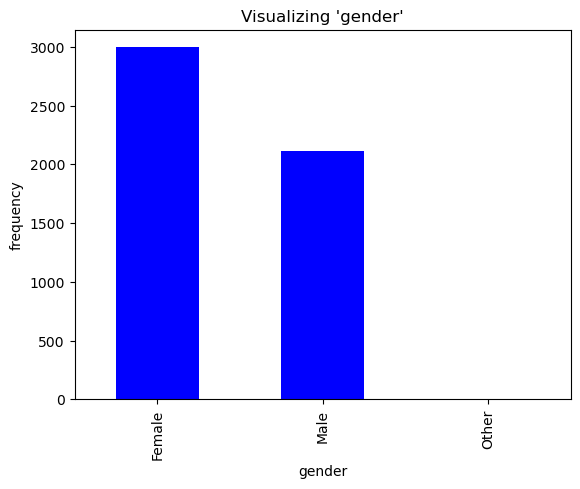

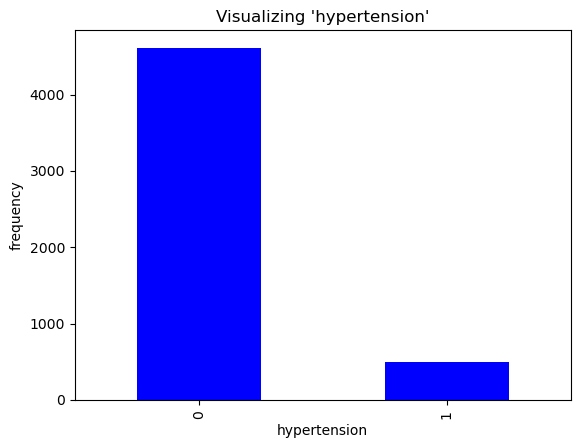

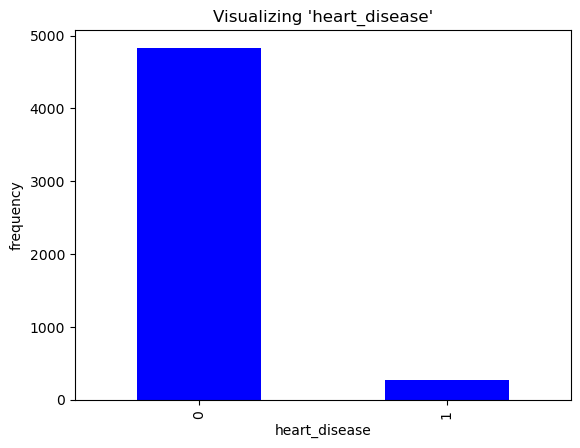

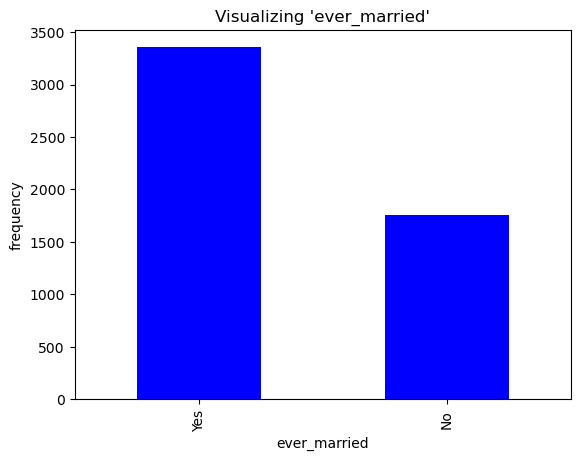

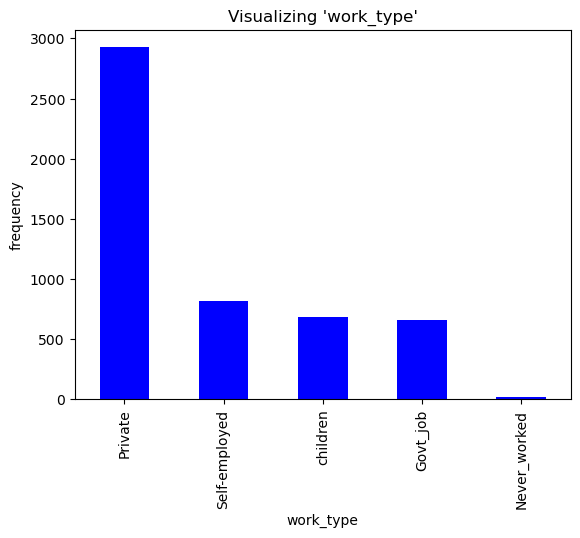

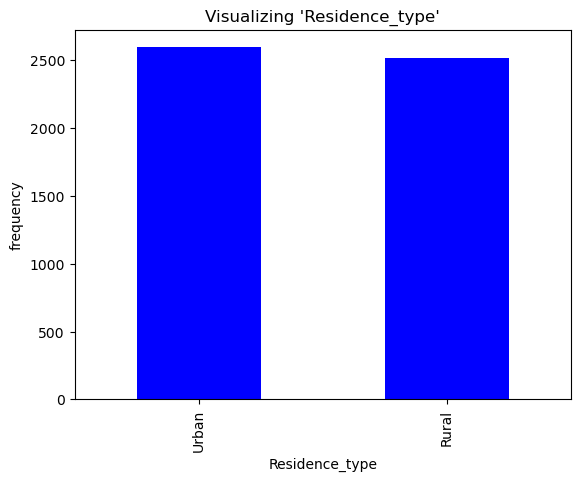

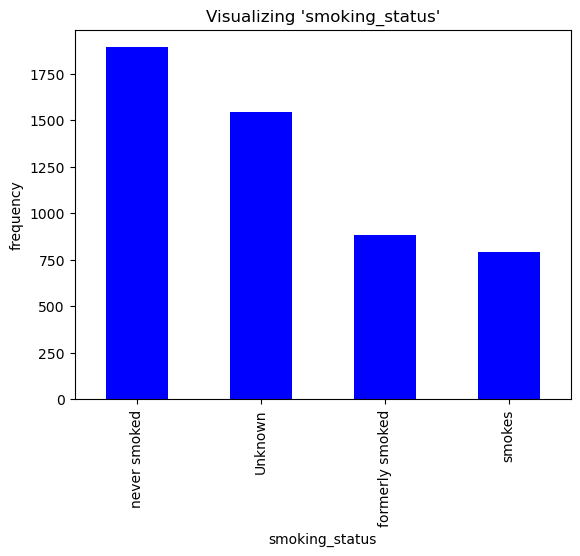

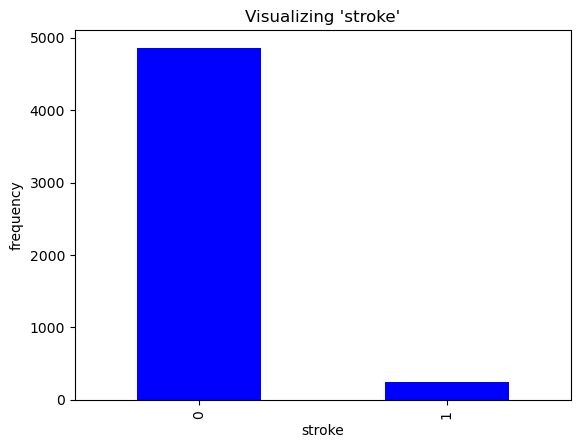

In [ ]:
for column in cat_df:
    unique_values = df[column].nunique()

    # Check if the column has 10 or fewer unique values
    if unique_values <= 10:
        df[column].value_counts().plot(kind='bar', color='blue')
        plt.title(f"Visualizing '{column}'")
        plt.xlabel(column)
        plt.ylabel("frequency")
        plt.show()
    else:
        print(f"'{column}' was not shown as it has more than 10 unique values ({unique_values}).")

### Explanation for the above bar charts:
* In the first barchart, we can see more females than males.
* Most of the individuals have been married in the second barchart.
* In the third barchart, a large portion of people work in the private sector.
* In the forth one, we can see there is a small percentage of difference between the population living in urban and rural areas.
* In the last barchart, we see that many individuals never smoked.

# MATPLOTLIB VISUALIZATIONS
Matplotlib is a library in Python for creating interactive and animated visualizations. With the Matplotlib we can generate a variety of charts and graphs to present the data in a visually appealing format. These visualizations play a crucial role in EDA by enabling the identification of patterns, outliers, and the distribution of data.

## Pie Chart:

<Axes: title={'center': 'Distribution of Work Type'}, ylabel='count'>

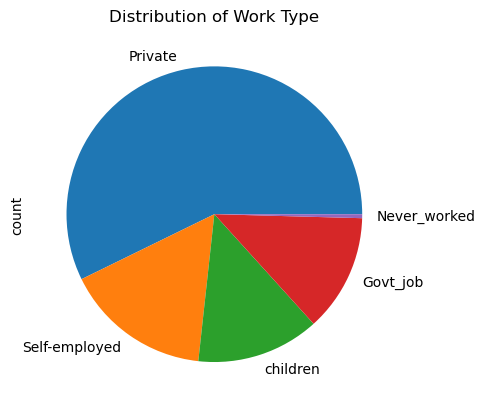

In [ ]:
df['work_type'].value_counts().plot(kind = 'pie', title = 'Distribution of Work Type')

## Pie Chart Analysis:
This pie chart shows the distribution of work types among individuals. The majority work is in the private sector, followed by self-employed individuals. The smaller portions are categorized as children, government job workers.

## Histograms for all numeric columns:

/var/folders/gj/vn56s0mn55x59x357s505vqm0000gp/T/ipykernel_65552/730908130.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(bins=30, ax=axes)


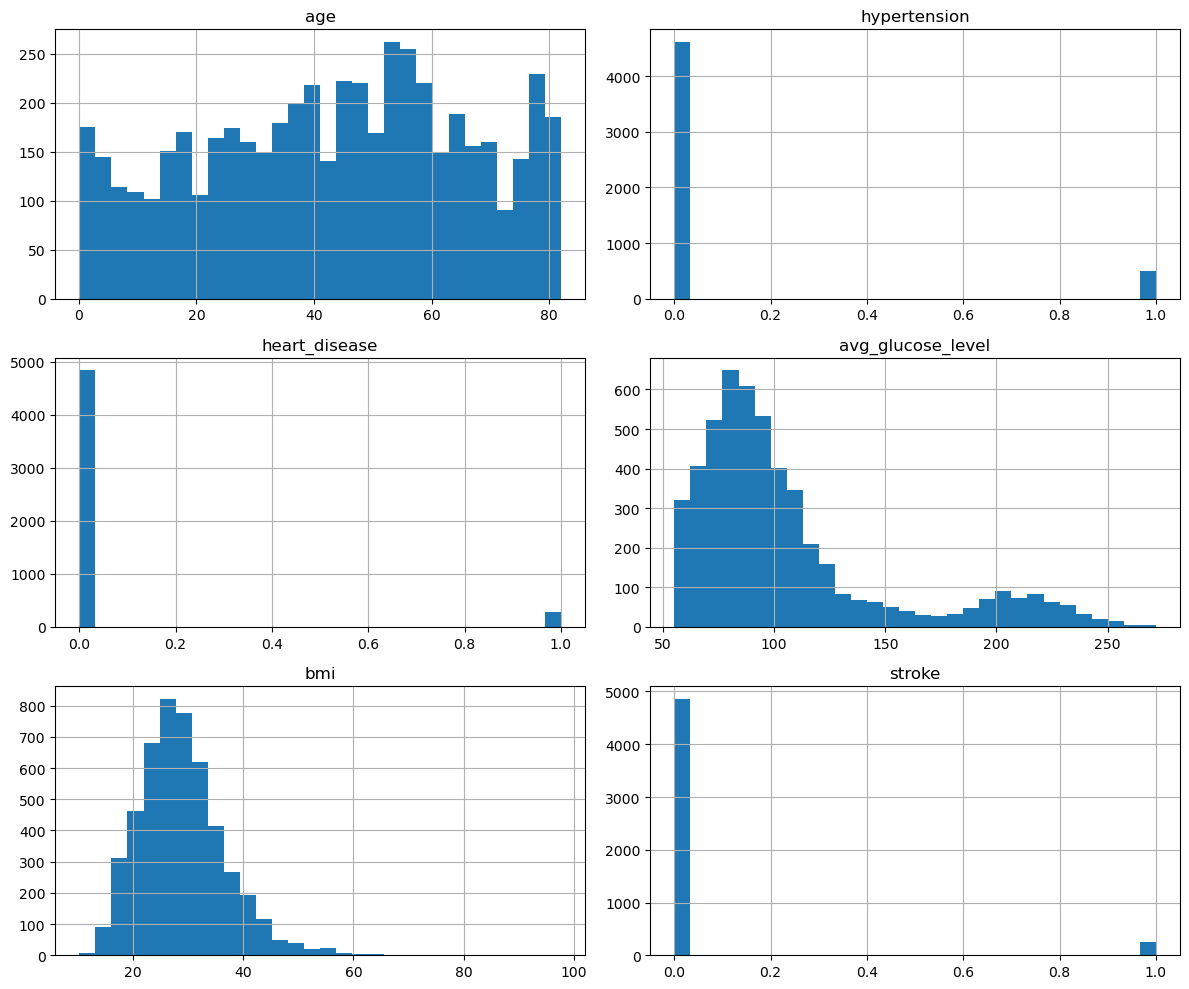

In [ ]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(figsize=(12, 10))  # Adjust the dimensions as needed

# Plot histograms for all numeric columns, using the axes array created above
df.hist(bins=30, ax=axes)

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

## Numeric Features Histograms Analysis:
* Age: Most individuals are between 40-60, with another smaller peak around age 80.

* Hypertension: A small percentage has hypertension; most do not.

* Heart Disease: Just like hypertension, heart disease has a very small percentage.

* Average Glucose Level: Glucose levels are mostly around 80–120, with few high values over 200.

* BMI: BMI mainly ranges from 20 to 40, covering normal to overweight categories.

* Stroke: Strokes are rare in this dataset, with only a few individuals affected.

# Scatter Plots

<Axes: xlabel='age', ylabel='stroke'>

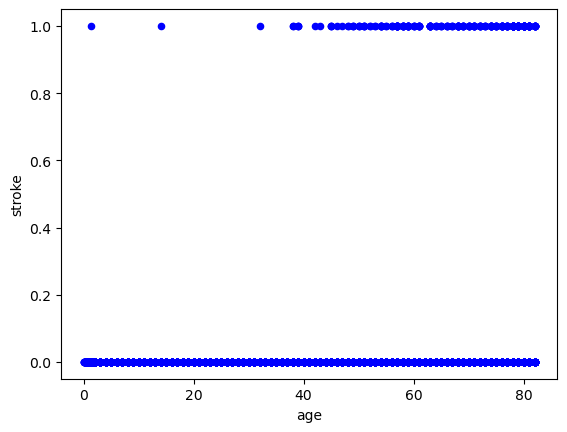

In [ ]:
df.plot.scatter( x= 'age', y = 'stroke', s = 20, c = 'Blue')

# Scatter Plot Analysis
In the above screenshot we are trying to demonstrate the relationship between age and stroke, as the age increases the chances of having a stroke aslo increases.


<Axes: xlabel='age', ylabel='work_type'>

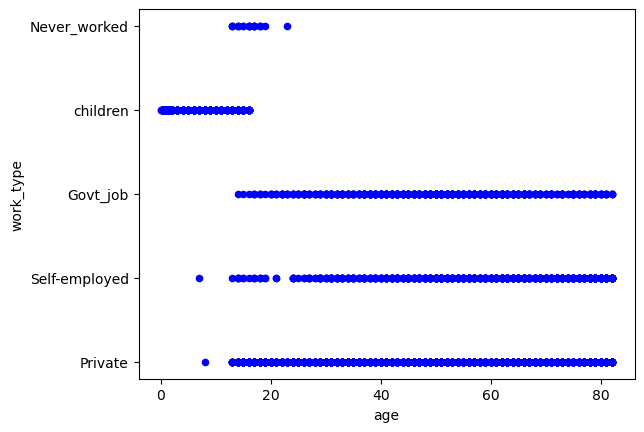

In [ ]:
df.plot.scatter( x= 'age', y = 'work_type', s = 20, c = 'Blue')

## Scatter plot - Analysis
We included both a pie chart and scatter plot of 'work type' to demonstrate different ways of visualizing the same categorical data; we chose 'work type' because it's our categorical feature with the most values. This chart shows how work type (occupation) varies with age. Each Blue dot represents a person’s Age and occupation. We see most children work as children until they find a better profession. 'Never worked' shows parts of the population that have mastered childhood, but aren't sure where to go next.  

# Feature Engineering

## Missing Data
 The bmi is our only variable with missing data at 201 missing values. To handle this, we used regression imputation because the percentage of missing data is (1%-5%) and because it allows us to fill the gaps with a more rigorous form of imputation. We find this important because it helps preserve our dataset's ability to meaningfully represent of a greater population.

### Selecting Remedy
* BMI

* Proportion: 3.93% of data is missing
* Importance: High
* Pattern: MAR (Missing at Random, not MCAR for reasons detailed below)
* REMEDY: We opted 'Regression imputation' due to the high importance of feature.

In [ ]:
# Counting missing values per column
missing_values = df.isnull().sum()

# Percentage of missing values
missing_percent = (missing_values / len(df) * 100).round(2)

# Creating a summary table
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent
}).sort_values(by='Percentage', ascending=False)

# Summary table
missing_summary


,Missing Values,Percentage
bmi,201,3.93
gender,0,0.00
age,0,0.00
hypertension,0,0.00
heart_disease,0,0.00
ever_married,0,0.00
work_type,0,0.00
Residence_type,0,0.00
avg_glucose_level,0,0.00
smoking_status,0,0.00


# Interpreting Relationships in Missingness

We looked for the presence of patterns between BMI missingness and our target variable, age, gender, and work type. We found interesting patterns with our target variable and age.

**Stroke:** Of our respondents that didn't report BMI, 20% had a stroke- this drops to 4% when a BMI score is present.

While BMI is a widely recognized index, we posit that one reason for the relationship between a missing BMI value and the significantly higher stroke percentage may be due to a lack of health literacy often sometimes associated with lifestyle patterns that increase stroke likelihood.


In [ ]:
# Counting missing cases:

# Creating a "mask" for missing values
missing_mask = df['bmi'].isnull()

# Comparing distributions of categorical feature
stroke_missing_comparison = df.groupby(missing_mask)['stroke'].value_counts(normalize=True) * 100
age_missing_comparison = df.groupby(missing_mask)['age'].value_counts(normalize=True) * 100
gender_missing_comparison = df.groupby(missing_mask)['gender'].value_counts(normalize=True) * 100



# Comparison
stroke_missing_comparison
age_missing_comparison
gender_missing_comparison


bmi    gender
False  Female    59.014056
       Male      40.965573
       Other      0.020371
True   Male      51.741294
       Female    48.258706
Name: proportion, dtype: float64

**Age:** While another speculation, we think a 9 year difference in mean age may be due to evolving education around medical terms. Another factor could be the popularity of fitness tracking tech among younger generations. Both could lead to younger populations engaging with fitness metrics in ways older generations may not.

In [ ]:
age_summary = df.groupby(missing_mask)['age'].describe()

age_summary.round(2)

,count,mean,std,min,25%,50%,75%,max
bmi,,,,,,,,
False,4909.0,42.87,22.56,0.08,25.0,44.0,60.0,82.0
True,201.0,52.05,22.28,0.48,37.0,58.0,71.0,82.0


In [ ]:
gender_summary = df.groupby(missing_mask)['gender'].value_counts(normalize=True) * 100

gender_summary.round(2)

bmi    gender
False  Female    59.01
       Male      40.97
       Other      0.02
True   Male      51.74
       Female    48.26
Name: proportion, dtype: float64

In [ ]:
work_type_summary = df.groupby(missing_mask)['work_type'].value_counts(normalize=True) * 100

work_type_summary.round(2)

bmi    work_type    
False  Private          57.26
       Self-employed    15.79
       children         13.67
       Govt_job         12.83
       Never_worked      0.45
True   Private          56.72
       Self-employed    21.89
       Govt_job         13.43
       children          7.96
Name: proportion, dtype: float64

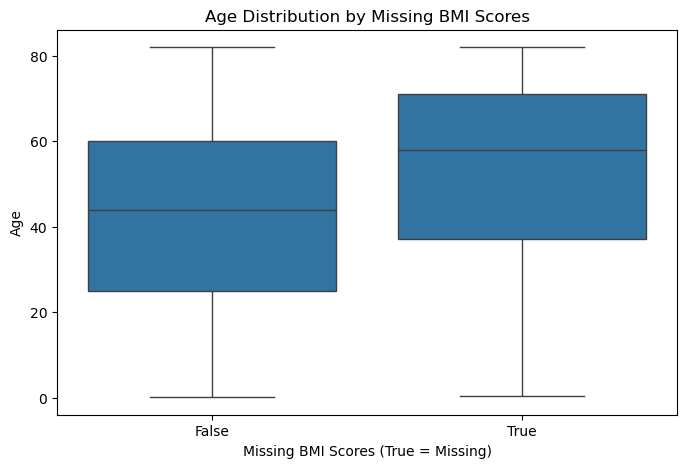

In [ ]:
#Visualization of Missing Data

plt.figure(figsize=(8, 5))
sns.boxplot(x=missing_mask, y=df['age'])
plt.xlabel('Missing BMI Scores (True = Missing)')
plt.ylabel('Age')
plt.title('Age Distribution by Missing BMI Scores')
plt.show()

## Using Regression Imputation to Fill Missing BMI Data

We start this imputation method by running correlations on BMI to help understand which predictors have the strongest relationship with BMI (making them suitable for regression)

In [ ]:
# running correlations for BMI

correlations = numeric_df.corr()['bmi'].sort_values(ascending=False)

print(correlations)

bmi                  1.000000
age                  0.333398
avg_glucose_level    0.175502
Name: bmi, dtype: float64


In [ ]:
# Only looking at highly correlated variables:
# While our dataset doesn't have enough numeric features to make use of this code, it can be useful

# Filter correlations with absolute value >= 0.1
high_corr_variables = correlations[correlations.abs() >= 0.1]

# Display the filtered variables
print(high_corr_variables)

bmi                  1.000000
age                  0.333398
avg_glucose_level    0.175502
Name: bmi, dtype: float64


In [ ]:
from sklearn.linear_model import LinearRegression

# Extract the features and target
features = list(high_corr_variables.index)
target = 'bmi'

# Remove the target variable from the features list
features.remove(target)

# Splitting the dataset into training and testing subsets
train_df = df[df[target].notnull()]
test_df = df[df[target].isnull()]

# Drop rows with missing values in predictors
train_df_clean = train_df.dropna(subset=features)

# Extract the cleaned features and target
train_features = train_df_clean[features]
train_target = train_df_clean[target]

# Initialize and train the regression model
model = LinearRegression()
model.fit(train_features, train_target)

# Predict the missing values
test_features = test_df[features].dropna()  # Drop rows with missing predictors
predicted_values = model.predict(test_features)

# Calculate the R-squared score for the model
r2_score = model.score(train_features, train_target)

# Output the R-squared score
print(f"R-squared score: {r2_score}")


# Assigning the predicted values back to the main dataframe
df.loc[test_features.index, 'bmi'] = predicted_values

# Verifying the imputation
missing_after_imputation = df['bmi'].isnull().sum()
print(f"Number of missing values in 'bmi' after imputation: {missing_after_imputation}")

R-squared score: 0.12109154559462498
Number of missing values in 'bmi' after imputation: 0


**Now that we've verified our missing data has been successfully addressed, we can move on to one hot encoding, a process that allows our categorical variables to be analyzed with our numeric variables**

# One Hot Encoding
* Identified Variables for One-Hot Encoding:
We identified the variable 'work_type', 'gender', and 'smoking_status' as categorical variables that requires one-hot encoding. One hot encoding should be applied to variables that are 1) categorical, and 2) not already dummy variables.

* Applied One-Hot Encoding:
We used the pd.get_dummies() function to create separate binary columns for each category in the work_type variable.

* The Dummy Variable Trap:
In one-hot encoding, each value within a feature is converted to its own feature/column. While this turns allows our categorical features to be interpreted by the model as numeric data, it also introduces perfect collinearity (ie: 'trues' and 'falses' in the 'ever_married_no' column will be perfect inverse of the 'trues' and 'falses' in the 'ever_married_yes' column.

To stay out of the trap, we dropped the columns 'work_type_Never_worked','gender_Other', 'gender_female', 'smoking_status_Unknown', 'Residence_type_Rural', 'ever_married_No'. We chose each of these columns (converted from values within their respective features) because we found them either difficult to explain (like smoking_status_unkown), because they are the closest to a default value (work_type_never_worked), or randomly for our features with two unique values (Residence_type_Rural).

While gender (outside of the one entry under the 'other' value), residence_type, and ever_married only had two unique values, we chose to apply one hot encoding to them over converting them to dummy variables for the sake of consistency.


In [ ]:
cat_df.columns

Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
#obtaining value counts for categorical features

counts = {col: df[col].value_counts() for col in ['work_type', 'gender', 'smoking_status', 'Residence_type', 'ever_married']}
print(counts)

{'work_type': work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64, 'gender': gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64, 'smoking_status': smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64, 'Residence_type': Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64, 'ever_married': ever_married
Yes    3353
No     1757
Name: count, dtype: int64}


In [ ]:
#converting
df = pd.get_dummies(df, columns=["work_type", "gender", "smoking_status", "Residence_type","ever_married"],
                    prefix=["work_type", "gender", "smoking_status", "Residence_type","ever_married"])
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,...,gender_Male,gender_Other,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Rural,Residence_type_Urban,ever_married_No,ever_married_Yes
id,,,,,,,,,,,,,,,,,,,,,
9046,67.0,0,1,228.69,36.600000,1,False,False,True,False,...,True,False,False,True,False,False,False,True,False,True
51676,61.0,0,0,202.21,32.603242,1,False,False,False,True,...,False,False,False,False,True,False,True,False,False,True
31112,80.0,0,1,105.92,32.500000,1,False,False,True,False,...,True,False,False,False,True,False,True,False,False,True
60182,49.0,0,0,171.23,34.400000,1,False,False,True,False,...,False,False,False,False,False,True,False,True,False,True
1665,79.0,1,0,174.12,24.000000,1,False,False,False,True,...,False,False,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18234,80.0,1,0,83.75,32.500627,0,False,False,True,False,...,False,False,False,False,True,False,False,True,False,True
44873,81.0,0,0,125.20,40.000000,0,False,False,False,True,...,False,False,False,False,True,False,False,True,False,True
19723,35.0,0,0,82.99,30.600000,0,False,False,False,True,...,False,False,False,False,True,False,True,False,False,True


In [ ]:
# List of boolean columns to convert
boolean_columns = ['work_type_Govt_job','work_type_Private','work_type_Self-employed','work_type_children','gender_Female','gender_Male','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes','Residence_type_Rural',	'Residence_type_Urban',	'ever_married_No','ever_married_Yes']

# Convert boolean columns to integers (0 and 1)
df[boolean_columns] = df[boolean_columns].astype(int)

# Verify the changes
print(df[boolean_columns].head())

       work_type_Govt_job  work_type_Private  work_type_Self-employed  \
id                                                                      
9046                    0                  1                        0   
51676                   0                  0                        1   
31112                   0                  1                        0   
60182                   0                  1                        0   
1665                    0                  0                        1   

       work_type_children  gender_Female  gender_Male  \
id                                                      
9046                    0              0            1   
51676                   0              1            0   
31112                   0              0            1   
60182                   0              1            0   
1665                    0              1            0   

       smoking_status_formerly smoked  smoking_status_never smoked  \
id                

In [ ]:
df.drop(['work_type_Never_worked','gender_Other', 'gender_Female', 'smoking_status_Unknown', 'Residence_type_Rural', 'ever_married_No'], axis=1, inplace=True)


df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,gender_Male,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Urban,ever_married_Yes
id,,,,,,,,,,,,,,,,
9046,67.0,0,1,228.69,36.600000,1,0,1,0,0,1,1,0,0,1,1
51676,61.0,0,0,202.21,32.603242,1,0,0,1,0,0,0,1,0,0,1
31112,80.0,0,1,105.92,32.500000,1,0,1,0,0,1,0,1,0,0,1
60182,49.0,0,0,171.23,34.400000,1,0,1,0,0,0,0,0,1,1,1
1665,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18234,80.0,1,0,83.75,32.500627,0,0,1,0,0,0,0,1,0,1,1
44873,81.0,0,0,125.20,40.000000,0,0,0,1,0,0,0,1,0,1,1
19723,35.0,0,0,82.99,30.600000,0,0,0,1,0,0,0,1,0,0,1


# Removing Outliers

Outliers in the numerical variables age, bmi, and avg_glucose_level were detected using boxplots and calculated using the IQR method. The count of outliers were as follows:
* age had no outliers
* bmi had 13
* avg_glucose_level had 166.

  To handle these outliers, we applied winsorization, which limits extreme values within the bounds defined by 1.5 times the IQR from the first and third quartiles. This method ensures that the data remains robust by reducing the influence of extreme values while preserving the integrity of the dataset for accurate and meaningful analysis.

We chose winsorization because

Something important to know about winsorization is that, like other means of handling outliers, it's not a perfect method. When collapsing the outliers to our new outer limit, we lose the degree to which they deviate from the norm


(**ei:** data that outlies by **1 standard deviation** is made to be **equal** to data that outlies by **4 standard deviations,** in winsorization the two are converted to points within a uniform set of outliers and their unique relationship to the rest of the data is lost)

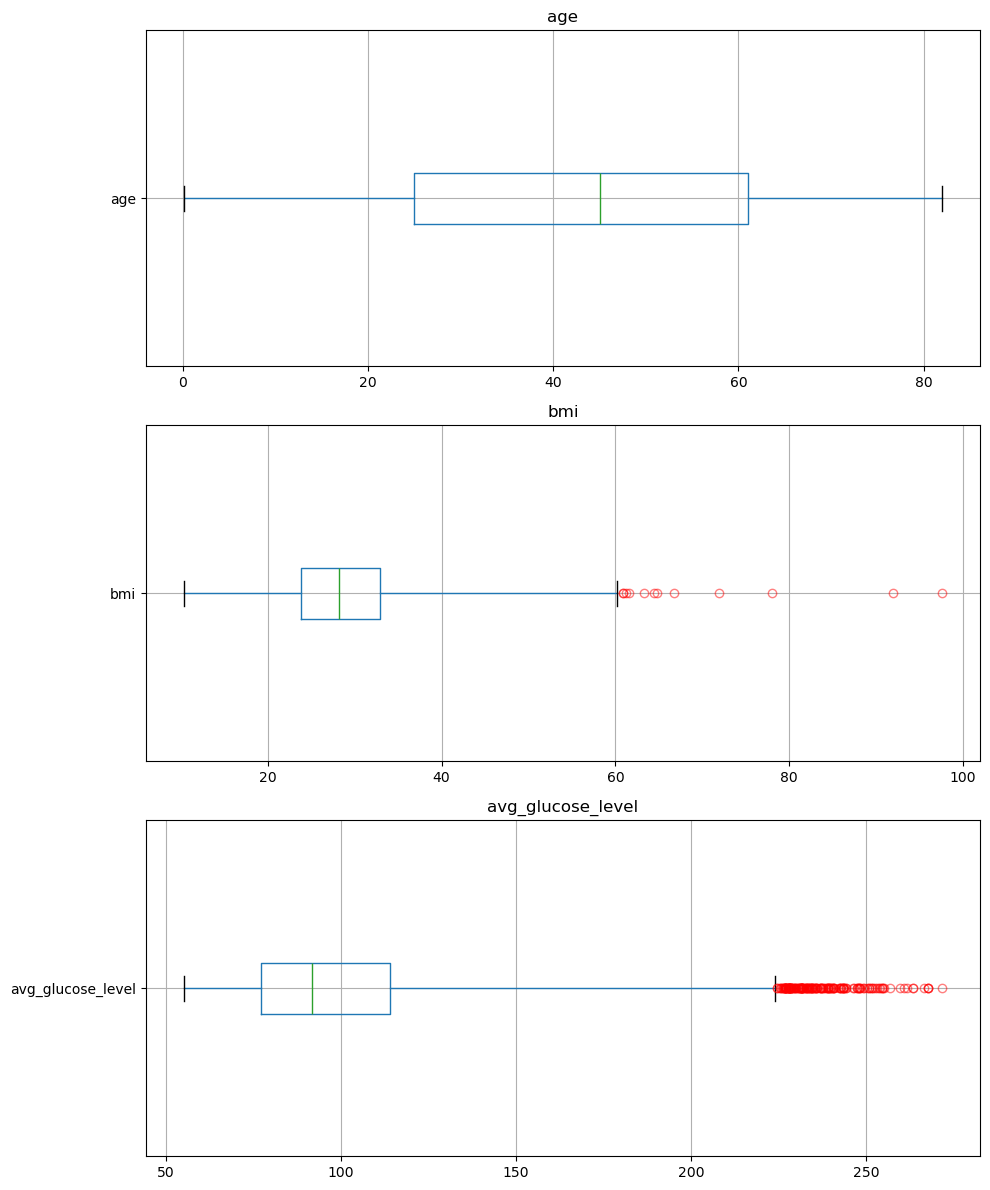

In [ ]:
# Create your visualization:

# Define the columns you want to plot, which are numerical and meaningful for outliers detection
numerical_columns =  ['age', 'bmi' , 'avg_glucose_level']

# Create box plots for each variable with whiskers extending to 3 x IQR
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(10, 12))

for i, col in enumerate(numerical_columns):
    df.boxplot(column=col, ax=axes[i], whis=3, vert=False, flierprops=dict(marker='o', markeredgecolor='red', alpha=0.5))
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


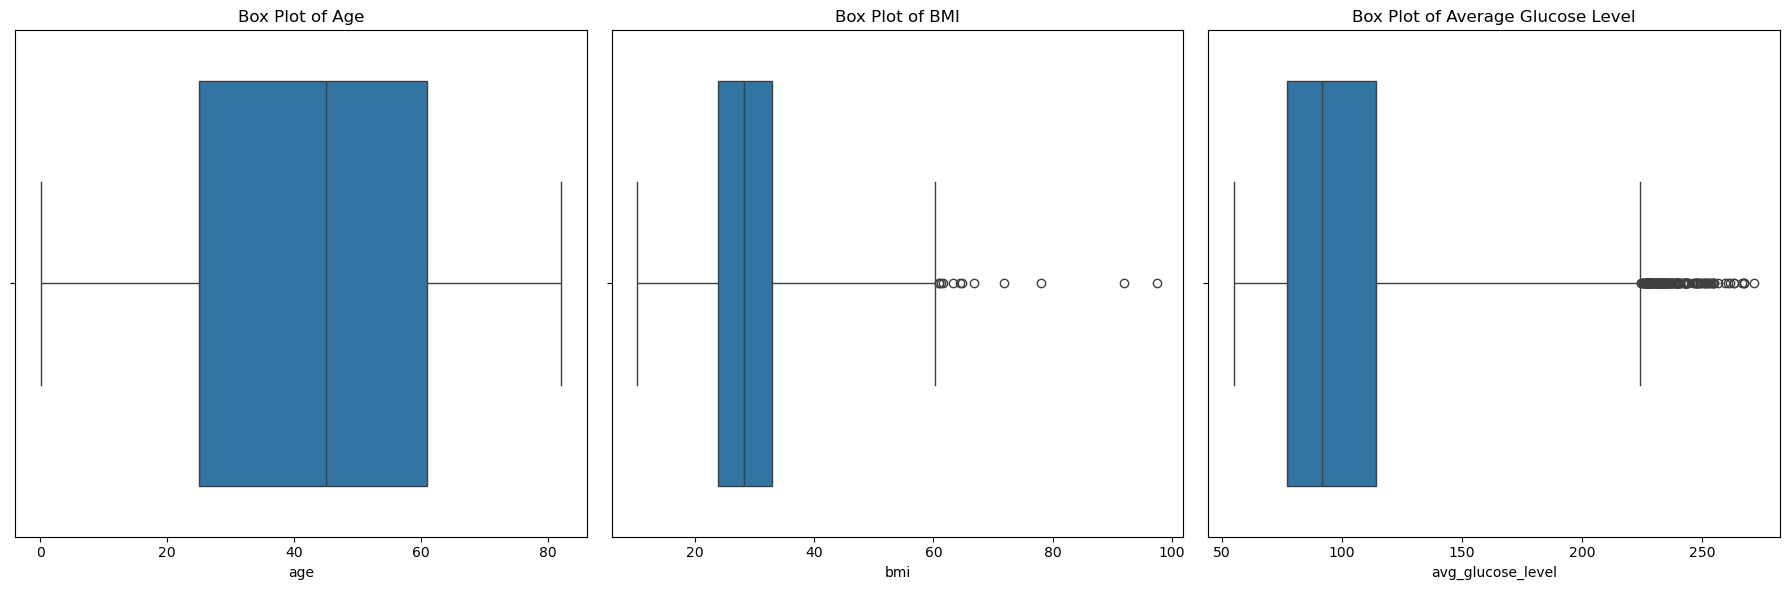

In [ ]:


# Create a figure and a set of subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjust figsize to suit layout

# Box plot for 'age'
sns.boxplot(x=df['age'], ax=axes[0], whis=3)
axes[0].set_title('Box Plot of Age')

# Box plot for 'bmi'
sns.boxplot(x=df['bmi'], ax=axes[1], whis=3)
axes[1].set_title('Box Plot of BMI')

# Box plot for 'avg_glucose_level'
sns.boxplot(x=df['avg_glucose_level'], ax=axes[2], whis=3)
axes[2].set_title('Box Plot of Average Glucose Level')

# Display the plots
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [ ]:
# Count your outliers:

# Dictionary to hold the count of outliers for each column
outliers_count = {}

# Loop through each numerical column to calculate outliers
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    # Count outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_count[column] = len(outliers)

# Print the results
print("Outliers count per feature:")
for key, value in outliers_count.items():
    print(f"{key}: {value}")


Outliers count per feature:
age: 0
bmi: 12
avg_glucose_level: 166


In [ ]:
# Remove your outliers:

from scipy.stats.mstats import winsorize


# Apply winsorization using 3 x IQR rule
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    # Calculate the limits for winsorization
    lower_limit = (df[column] < lower_bound).sum() / len(df[column])
    upper_limit = (df[column] > upper_bound).sum() / len(df[column])

    # Winsorize the column
    df[column] = winsorize(df[column], limits=(lower_limit, upper_limit))

# Print the first few rows of the modified DataFrame to verify changes
df


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,gender_Male,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Urban,ever_married_Yes
id,,,,,,,,,,,,,,,,
9046,67.0,0,1,224.10,36.600000,1,0,1,0,0,1,1,0,0,1,1
51676,61.0,0,0,202.21,32.603242,1,0,0,1,0,0,0,1,0,0,1
31112,80.0,0,1,105.92,32.500000,1,0,1,0,0,1,0,1,0,0,1
60182,49.0,0,0,171.23,34.400000,1,0,1,0,0,0,0,0,1,1,1
1665,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18234,80.0,1,0,83.75,32.500627,0,0,1,0,0,0,0,1,0,1,1
44873,81.0,0,0,125.20,40.000000,0,0,0,1,0,0,0,1,0,1,1
19723,35.0,0,0,82.99,30.600000,0,0,0,1,0,0,0,1,0,0,1


In [ ]:
# Dictionary to hold the count of outliers for each column
outliers_count = {}

# Loop through each numerical column to calculate outliers
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    # Count outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_count[column] = len(outliers)

# Print the results
print("Outliers count per feature:")
for key, value in outliers_count.items():
    print(f"{key}: {value}")


Outliers count per feature:
age: 0
bmi: 0
avg_glucose_level: 0


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the Mask

# Correlation Matrix
The correlation heatmap reveals that the relationships between the numerical variables (age, BMI, and average glucose level) are weak, with the highest correlation being 0.33 between age and BMI. There is no evidence of multicollinearity, as none of the correlation coefficients are close to ±1. Therefore, all features can be retained for further analysis without concerns about redundancy.


In [ ]:
# Create your heatmap:

# Identifying our numerical columns
numerical_columns = ['age', 'bmi' , 'avg_glucose_level']

# Create a DataFrame with only the numerical columns
df_numerical = df[numerical_columns]

# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))  # Set the size of the figure
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation Matrix')
plt.show()

NameError: name 'df' is not defined

## Variance Inflation Factor (VIF)

#### Let's begin by obtaining the VIF values for numeric feature. The cutoff we will use for assessing VIF is 10.0
Variance Inflation Factor (VIF) helps us check if any variables in our dataset are too similar to each other, which can cause issues in regression models. Since we have few VIF values above 10, it means there’s a  multicollinearity, and we are not removing any variable because they are most important to predict.

In [ ]:
# Calculate VIF for each explanatory variable

vif_data = pd.DataFrame()
vif_data["variable"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

vif_data.sort_values("VIF", ascending=False, inplace=True)

vif_data

,variable,VIF
4,bmi,19.625248
7,work_type_Private,18.411016
0,age,13.823368
3,avg_glucose_level,7.486602
8,work_type_Self-employed,6.631401
15,ever_married_Yes,5.777220
6,work_type_Govt_job,5.200547
12,smoking_status_never smoked,2.822351
9,work_type_children,2.803946
14,Residence_type_Urban,2.023146


In [ ]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,gender_Male,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Urban,ever_married_Yes
id,,,,,,,,,,,,,,,,
9046,67.0,0,1,224.10,36.600000,1,0,1,0,0,1,1,0,0,1,1
51676,61.0,0,0,202.21,32.603242,1,0,0,1,0,0,0,1,0,0,1
31112,80.0,0,1,105.92,32.500000,1,0,1,0,0,1,0,1,0,0,1
60182,49.0,0,0,171.23,34.400000,1,0,1,0,0,0,0,0,1,1,1
1665,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18234,80.0,1,0,83.75,32.500627,0,0,1,0,0,0,0,1,0,1,1
44873,81.0,0,0,125.20,40.000000,0,0,0,1,0,0,0,1,0,1,1
19723,35.0,0,0,82.99,30.600000,0,0,0,1,0,0,0,1,0,0,1


# Feature Scaling

In this step, we applied feature scaling to ensure all numeric variables are on the same scale, which is essential for models sensitive to varying magnitudes. First, we identified numeric features such as age, BMI, and average glucose level, excluding dummy variables like binary categories. We used the StandardScaler, which transforms the data by centering it around zero with a standard deviation of one. This helps models like logistic regression and neural networks perform better by preventing larger values from dominating smaller ones. Scaling ensures that each feature contributes equally to the model's learning process.

In [ ]:
# Scaling our features:

# Separating numeric and dummy variable features:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
dummy_features = [col for col in numeric_features if df[col].nunique() == 2]  # Likely dummy variables
non_dummy_numeric_features = numeric_features.difference(dummy_features)

# Applying scaling to non-dummy numeric features
scaler = StandardScaler()
df[non_dummy_numeric_features] = scaler.fit_transform(df[non_dummy_numeric_features])


df.head()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,gender_Male,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Urban,ever_married_Yes
id,,,,,,,,,,,,,,,,
9046,1.051434,0,1,2.692303,1.011728,1,0,1,0,0,1,1,0,0,1,1
51676,0.786070,0,0,2.194553,0.484957,1,0,0,1,0,0,0,1,0,0,1
31112,1.626390,0,1,0.005045,0.471350,1,0,1,0,0,1,0,1,0,0,1
60182,0.255342,0,0,1.490109,0.721769,1,0,1,0,0,0,0,0,1,1,1
1665,1.582163,1,0,1.555824,-0.648945,1,0,0,1,0,0,0,1,0,0,1


# Model Development and Evaluation

### Splitting features and Target:

In [ ]:


X = df.drop(['stroke'], axis=1)
y = df['stroke']

X

,age,hypertension,heart_disease,avg_glucose_level,bmi,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,gender_Male,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Urban,ever_married_Yes
id,,,,,,,,,,,,,,,
9046,1.051434,0,1,2.692303,1.011728,0,1,0,0,1,1,0,0,1,1
51676,0.786070,0,0,2.194553,0.484957,0,0,1,0,0,0,1,0,0,1
31112,1.626390,0,1,0.005045,0.471350,0,1,0,0,1,0,1,0,0,1
60182,0.255342,0,0,1.490109,0.721769,0,1,0,0,0,0,0,1,1,1
1665,1.582163,1,0,1.555824,-0.648945,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18234,1.626390,1,0,-0.499072,0.471433,0,1,0,0,0,0,1,0,1,1
44873,1.670617,0,0,0.443447,1.459846,0,0,1,0,0,0,1,0,1,1
19723,-0.363842,0,0,-0.516353,0.220931,0,0,1,0,0,0,1,0,0,1


In [ ]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Creating a Logistic Regression model:

In [ ]:
logreg = LogisticRegression()


# Training the model:
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predicting the Test set results:

y_pred = logreg.predict(X_test)

### Confusion Matrix:

In [ ]:
# Creating a more readable matrix:

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index=['Actual Negative', 'Actual Positive'],
                     columns=['Predicted Negative', 'Predicted Positive'])

print(cm_df)

                 Predicted Negative  Predicted Positive
Actual Negative                1444                   0
Actual Positive                  88                   1


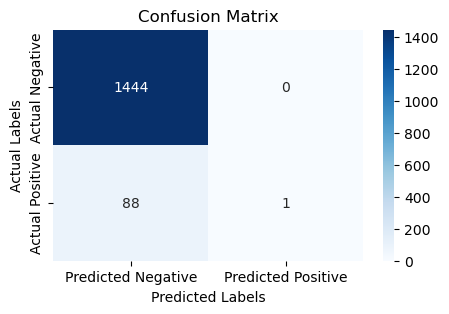

In [ ]:
# Leveraging Seaborn & Matplotlib Visualizations

plt.figure(figsize=(5, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [ ]:
# Calculate the percentage of the sample that accepted
accept_perc = df['stroke'].mean() * 100


# Print the results, rounding to 2 decimal places
if accept_perc >= 50:
    null = round(accept_perc, 2)
else:
    null = round(100 - accept_perc, 2)

print(f"Null Model: {null}%")

Null Model: 95.13%


In [ ]:
# Pulling data from the confusion matrix

TN, FP, FN, TP = cm[0][0], cm[0][1], cm[1][0], cm[1][1]

TN, FP, FN, TP

(1444, 0, 88, 1)

In [ ]:
# Calculating predictive power:

pred_power = round(((TN + TP) / (TN + TP + FN + FP))*100, 2)

print(f"Predictive Power: {pred_power}%")

Predictive Power: 94.26%


In [ ]:
precision = round(((TP) / (TP + FP))*100, 2)

print(f"Precision: {precision}%")

Precision: 100.0%


In [ ]:
sensitivity = round(((TP) / (TP + FN))*100, 2)

print(f"Sensitivity: {sensitivity}%")

Sensitivity: 1.12%


In [ ]:
specificity = round(((TN) / (FP + TN))*100, 2)

print(f"Specificity: {specificity}%")

Specificity: 100.0%


In [ ]:
# Get the coefficients from the model
coefficients = logreg.coef_[0]

# Calculate the exponentiated coefficients (odds ratios)
odds_ratios = np.exp(coefficients)

# Print the odds ratios for each feature
for feature, odds in zip(X.columns, odds_ratios):
    print(f"{feature}: exp(b) = {odds:.4f}")

age: exp(b) = 5.5201
hypertension: exp(b) = 1.4396
heart_disease: exp(b) = 1.3335
avg_glucose_level: exp(b) = 1.2127
bmi: exp(b) = 1.0577
work_type_Govt_job: exp(b) = 0.7066
work_type_Private: exp(b) = 0.8175
work_type_Self-employed: exp(b) = 0.5205
work_type_children: exp(b) = 2.1150
gender_Male: exp(b) = 0.9552
smoking_status_formerly smoked: exp(b) = 0.8555
smoking_status_never smoked: exp(b) = 0.8394
smoking_status_smokes: exp(b) = 1.2013
Residence_type_Urban: exp(b) = 1.1019
ever_married_Yes: exp(b) = 0.7011


# Interpreting Exp(B) Coefficients
The exp(b) values show how much each factor increases or decreases the chance of a stroke, assuming all other factors stay the same.

* **Age (5.4276):**
A significant factor. For every unit increase in age, the likelihood of experiencing a stroke increases by more than 5 times. This aligns with the understanding that stroke risk grows with age.
* **Hypertension (1.4449) and Heart Disease (1.3375):** Patients with hypertension or heart disease are about 1.4 times and 1.3 times more likely to experience a stroke, respectively.
* **Average Glucose Level (1.2123) and BMI (1.0506):** Higher glucose levels and BMI slightly increase the stroke risk.
* **Work Type:** The results vary:
  * Those working in self-employment (0.6383) are less likely to have a stroke compared to those in private jobs.
  * Government jobs (0.8662) and never worked (0.9020) show slightly lower risks as well.
  * Children (1.9944) have nearly double the likelihood of stroke, potentially reflecting certain underlying health conditions in the dataset rather than actual occupational factors.
* **Gender:** Being female (1.0154) or male (0.9741) shows minimal impact on stroke risk.
* **Smoking Status:**
  * Those who currently smoke (1.2348) or have an unknown smoking status (1.0351) show a higher likelihood of stroke.
  * Former smokers (0.8886) and those who never smoked (0.8709) have slightly reduced stroke risk.
* **Residence Type:**
Urban residents (1.0450) show a slightly higher risk of stroke than rural residents (0.9465), though the difference is small.
* **Marriage:**
  * Those who have never married (1.1973) show a slightly higher stroke risk.
  * Being married (0.8261) seems to slightly reduce the likelihood, which may be linked to lifestyle or social support factors.

    
# Model Performance
* **Null Model (95.13%)**: This is the baseline accuracy the model achieves by predicting the majority class ("No Stroke"). A high null accuracy reflects the imbalance in the dataset, with far more "No Stroke" cases than "Stroke" cases.
* **Predictive Power (94.26%)**: The model's accuracy in predicting stroke. It doesn’t outperform the null model, indicating the challenges posed by the imbalanced data.
* **Precision (100.0%)**: Precision measures how many of the predicted "Stroke" cases are actually correct. A perfect precision score (100%) means the model doesn’t produce false positives.
* **Sensitivity (1.12%)**: Sensitivity measures the model's ability to detect true "Stroke" cases. A very low sensitivity score indicates that the model misses almost all actual stroke cases, which is a significant limitation.
* **Specificity (100.0%)**: Specificity measures the ability to correctly identify "No Stroke" cases. A score of 100% means the model predicts all "No Stroke" cases accurately.


# Key Takeaways
The high accuracy and specificity reflect the model’s ability to correctly classify "No Stroke" cases due to the class imbalance.
However, the very low sensitivity indicates that the model struggles to identify actual "Stroke" cases, which limits its usefulness in real-world healthcare settings.
Addressing the imbalance in the dataset (e.g., using oversampling, undersampling, or weighted models) could improve the model's sensitivity and make it more effective in predicting strokes.

# Overall Findings:
* Age appears to be one of the most significant factors in stroke prediction, with higher age groups exhibiting increased stroke occurrences.
* Heart disease and hypertension also correlate positively with stroke presence.
* Higher BMI levels are often linked with conditions like hypertension and heart disease, which can increase the likelihood of stroke, but there is no direct relationship between a high BMI and Stroke.
* Conclusively, this project helped us understand that most of the population had not had any strokes leaving only a few who had a stroke.

In [ ]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,gender_Male,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Urban,ever_married_Yes
id,,,,,,,,,,,,,,,,
9046,1.051434,0,1,2.692303,1.011728,1,0,1,0,0,1,1,0,0,1,1
51676,0.786070,0,0,2.194553,0.484957,1,0,0,1,0,0,0,1,0,0,1
31112,1.626390,0,1,0.005045,0.471350,1,0,1,0,0,1,0,1,0,0,1
60182,0.255342,0,0,1.490109,0.721769,1,0,1,0,0,0,0,0,1,1,1
1665,1.582163,1,0,1.555824,-0.648945,1,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18234,1.626390,1,0,-0.499072,0.471433,0,0,1,0,0,0,0,1,0,1,1
44873,1.670617,0,0,0.443447,1.459846,0,0,0,1,0,0,0,1,0,1,1
19723,-0.363842,0,0,-0.516353,0.220931,0,0,0,1,0,0,0,1,0,0,1


# Comparative Analysis

Here we're changing two methods used during our feature engineering to see if they improve the predictive power of our model.

In [ ]:
# Importing libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Reading the dataframe:

df= pd.read_csv("healthcare-dataset-stroke-data.csv")

#setting index
df.set_index("id", inplace=True)

df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


Checking the missing values

In [ ]:
# Count of missing values per column
missing_values = df.isnull().sum()

# Percentage of missing values
missing_percent = (missing_values / len(df)) * 100

# Create a summary table
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent
}).sort_values(by='Percentage', ascending=False)

# Display the summary table
missing_summary

,Missing Values,Percentage
bmi,201,3.933464
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
smoking_status,0,0.000000


we try to use mean imputation instead of regression imputation to handle the missingness of bmi

In [ ]:
# Calculate skewness and kurtosis for BMI
skew_regular = df['bmi'].skew().round(2)
kurtosis_regular = df['bmi'].kurt().round(2)

# Output the results
print(f"BMI - Skewness: {skew_regular}, Kurtosis: {kurtosis_regular}")


BMI - Skewness: 1.06, Kurtosis: 3.36


In [ ]:
# Perform mean imputation for bmi
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

# Verify the imputation
print("Number of missing values in 'bmi':", df['bmi'].isnull().sum())

Number of missing values in 'bmi': 0


OUTLIERS HANDLING

In [ ]:
# Dictionary to hold the count of outliers for each column
outliers_count = {}

# Loop through each numerical column to calculate outliers
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    # Count outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_count[column] = len(outliers)

# Print the results
print("Outliers count per feature:")
for key, value in outliers_count.items():
    print(f"{key}: {value}")


Outliers count per feature:
age: 0
bmi: 13
avg_glucose_level: 166


In [ ]:
# Remove your outliers:

from scipy.stats.mstats import winsorize


# Apply winsorization using 3 x IQR rule
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    # Calculate the limits for winsorization
    lower_limit = (df[column] < lower_bound).sum() / len(df[column])
    upper_limit = (df[column] > upper_bound).sum() / len(df[column])

    # Winsorize the column
    df[column] = winsorize(df[column], limits=(lower_limit, upper_limit))

# Print the first few rows of the modified DataFrame to verify changes
df


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,224.10,36.600000,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0


In [ ]:
# Dictionary to hold the count of outliers for each column
outliers_count = {}

# Loop through each numerical column to calculate outliers
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    # Count outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_count[column] = len(outliers)

# Print the results
print("Outliers count per feature:")
for key, value in outliers_count.items():
    print(f"{key}: {value}")


Outliers count per feature:
age: 0
bmi: 0
avg_glucose_level: 0


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the Mask

ONE HOT ENCODING

In [ ]:
#converting
df = pd.get_dummies(df, columns=["work_type", "gender", "smoking_status", "Residence_type","ever_married"],
                    prefix=["work_type", "gender", "smoking_status", "Residence_type","ever_married"])
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,...,gender_Male,gender_Other,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Rural,Residence_type_Urban,ever_married_No,ever_married_Yes
id,,,,,,,,,,,,,,,,,,,,,
9046,67.0,0,1,224.10,36.600000,1,False,False,True,False,...,True,False,False,True,False,False,False,True,False,True
51676,61.0,0,0,202.21,28.893237,1,False,False,False,True,...,False,False,False,False,True,False,True,False,False,True
31112,80.0,0,1,105.92,32.500000,1,False,False,True,False,...,True,False,False,False,True,False,True,False,False,True
60182,49.0,0,0,171.23,34.400000,1,False,False,True,False,...,False,False,False,False,False,True,False,True,False,True
1665,79.0,1,0,174.12,24.000000,1,False,False,False,True,...,False,False,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18234,80.0,1,0,83.75,28.893237,0,False,False,True,False,...,False,False,False,False,True,False,False,True,False,True
44873,81.0,0,0,125.20,40.000000,0,False,False,False,True,...,False,False,False,False,True,False,False,True,False,True
19723,35.0,0,0,82.99,30.600000,0,False,False,False,True,...,False,False,False,False,True,False,True,False,False,True


In [ ]:
# List of boolean columns to convert
boolean_columns = ['work_type_Govt_job','work_type_Private','work_type_Self-employed','work_type_children','gender_Female','gender_Male','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes','Residence_type_Rural',	'Residence_type_Urban',	'ever_married_No','ever_married_Yes']

# Convert boolean columns to integers (0 and 1)
df[boolean_columns] = df[boolean_columns].astype(int)

# Verify the changes
print(df[boolean_columns].head())

       work_type_Govt_job  work_type_Private  work_type_Self-employed  \
id                                                                      
9046                    0                  1                        0   
51676                   0                  0                        1   
31112                   0                  1                        0   
60182                   0                  1                        0   
1665                    0                  0                        1   

       work_type_children  gender_Female  gender_Male  \
id                                                      
9046                    0              0            1   
51676                   0              1            0   
31112                   0              0            1   
60182                   0              1            0   
1665                    0              1            0   

       smoking_status_formerly smoked  smoking_status_never smoked  \
id                

In [ ]:
df.drop(['work_type_Never_worked','gender_Other', 'gender_Female', 'smoking_status_Unknown', 'Residence_type_Rural', 'ever_married_No'], axis=1, inplace=True)


df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,gender_Male,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Urban,ever_married_Yes
id,,,,,,,,,,,,,,,,
9046,67.0,0,1,224.10,36.600000,1,0,1,0,0,1,1,0,0,1,1
51676,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,0,1,0,0,1
31112,80.0,0,1,105.92,32.500000,1,0,1,0,0,1,0,1,0,0,1
60182,49.0,0,0,171.23,34.400000,1,0,1,0,0,0,0,0,1,1,1
1665,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18234,80.0,1,0,83.75,28.893237,0,0,1,0,0,0,0,1,0,1,1
44873,81.0,0,0,125.20,40.000000,0,0,0,1,0,0,0,1,0,1,1
19723,35.0,0,0,82.99,30.600000,0,0,0,1,0,0,0,1,0,0,1


FEATURE SCALING

In [ ]:
# Scaling our features:

# Separating numeric and dummy variable features:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
dummy_features = [col for col in numeric_features if df[col].nunique() == 2]  # Likely dummy variables
non_dummy_numeric_features = numeric_features.difference(dummy_features)

# Applying scaling to non-dummy numeric features
scaler = StandardScaler()
df[non_dummy_numeric_features] = scaler.fit_transform(df[non_dummy_numeric_features])


df.head()


RUNNING THE MODEL

In [ ]:
logreg = LogisticRegression()


# Training the model:
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predicting the Test set results:

y_pred = logreg.predict(X_test)

In [ ]:
# Creating a more readable matrix:

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index=['Actual Negative', 'Actual Positive'],
                     columns=['Predicted Negative', 'Predicted Positive'])

print(cm_df)

                 Predicted Negative  Predicted Positive
Actual Negative                1444                   0
Actual Positive                  88                   1


In [ ]:
# Calculate the percentage of the sample that accepted
accept_perc = df['stroke'].mean() * 100


# Print the results, rounding to 2 decimal places
if accept_perc >= 50:
    null = round(accept_perc, 2)
else:
    null = round(100 - accept_perc, 2)

print(f"Null Model: {null}%")

Null Model: 95.13%


In [ ]:
# Calculate the percentage of the sample that accepted
accept_perc = df['stroke'].mean() * 100


# Print the results, rounding to 2 decimal places
if accept_perc >= 50:
    null = round(accept_perc, 2)
else:
    null = round(100 - accept_perc, 2)

print(f"Null Model: {null}%")

Null Model: 95.13%


In [ ]:
# Calculating predictive power:

pred_power = round(((TN + TP) / (TN + TP + FN + FP))*100, 2)

print(f"Predictive Power: {pred_power}%")

Predictive Power: 94.26%


In [ ]:
precision = round(((TP) / (TP + FP))*100, 2)

print(f"Precision: {precision}%")

Precision: 100.0%


In [ ]:
sensitivity = round(((TP) / (TP + FN))*100, 2)

print(f"Sensitivity: {sensitivity}%")

Sensitivity: 1.12%


In [ ]:
specificity = round(((TN) / (FP + TN))*100, 2)

print(f"Specificity: {specificity}%")

Specificity: 100.0%


In [ ]:
# Get the coefficients from the model
coefficients = logreg.coef_[0]

# Calculate the exponentiated coefficients (odds ratios)
odds_ratios = np.exp(coefficients)

# Print the odds ratios for each feature
for feature, odds in zip(X.columns, odds_ratios):
    print(f"{feature}: exp(b) = {odds:.4f}")

age: exp(b) = 5.5201
hypertension: exp(b) = 1.4396
heart_disease: exp(b) = 1.3335
avg_glucose_level: exp(b) = 1.2127
bmi: exp(b) = 1.0577
work_type_Govt_job: exp(b) = 0.7066
work_type_Private: exp(b) = 0.8175
work_type_Self-employed: exp(b) = 0.5205
work_type_children: exp(b) = 2.1150
gender_Male: exp(b) = 0.9552
smoking_status_formerly smoked: exp(b) = 0.8555
smoking_status_never smoked: exp(b) = 0.8394
smoking_status_smokes: exp(b) = 1.2013
Residence_type_Urban: exp(b) = 1.1019
ever_married_Yes: exp(b) = 0.7011


We tried using mean imputation instead of regression imputation to handle missing values, but the model's performance remained the same. There was no noticeable difference in the results, suggesting that the choice of imputation method did not significantly impact the model's ability to make predictions.

Evaluate Feature Selection

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Setting maximum iterations for Logistic Regression
log_reg = LogisticRegression(max_iter=500)

# Reading the dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

# Setting 'id' column as the index for better data management
df.set_index("id", inplace=True)

# Displaying the first few rows of the dataframe to confirm successful loading
df


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


CHECKING MISSING VALUES

In [ ]:
# Count of missing values per column
missing_values = df.isnull().sum()

# Percentage of missing values
missing_percent = (missing_values / len(df)) * 100

# Create a summary table
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent
}).sort_values(by='Percentage', ascending=False)

# Display the summary table
missing_summary

,Missing Values,Percentage
bmi,201,3.933464
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
smoking_status,0,0.000000


HANDLING MISSINGNESS

In [ ]:
# Perform mean imputation for BMI
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

# Verify the imputation
print("Number of missing values in 'bmi':", df['bmi'].isnull().sum())

Number of missing values in 'bmi': 0


HANDLING OUTLIERS

In [ ]:
# Dictionary to hold the count of outliers for each column
outliers_count = {}

# Loop through each numerical column to calculate outliers
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    # Count outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_count[column] = len(outliers)

# Print the results
print("Outliers count per feature:")
for key, value in outliers_count.items():
    print(f"{key}: {value}")

Outliers count per feature:
age: 0
bmi: 13
avg_glucose_level: 166


In [ ]:
# Remove your outliers:

from scipy.stats.mstats import winsorize


# Apply winsorization using 3 x IQR rule
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    # Calculate the limits for winsorization
    lower_limit = (df[column] < lower_bound).sum() / len(df[column])
    upper_limit = (df[column] > upper_bound).sum() / len(df[column])

    # Winsorize the column
    df[column] = winsorize(df[column], limits=(lower_limit, upper_limit))

# Print the first few rows of the modified DataFrame to verify changes
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,224.10,36.600000,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0


ONE HOT ENCODING

In [ ]:
#converting
df = pd.get_dummies(df, columns=["work_type", "gender", "smoking_status", "Residence_type","ever_married"],
                    prefix=["work_type", "gender", "smoking_status", "Residence_type","ever_married"])
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,...,gender_Male,gender_Other,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Rural,Residence_type_Urban,ever_married_No,ever_married_Yes
id,,,,,,,,,,,,,,,,,,,,,
9046,67.0,0,1,224.10,36.600000,1,False,False,True,False,...,True,False,False,True,False,False,False,True,False,True
51676,61.0,0,0,202.21,28.893237,1,False,False,False,True,...,False,False,False,False,True,False,True,False,False,True
31112,80.0,0,1,105.92,32.500000,1,False,False,True,False,...,True,False,False,False,True,False,True,False,False,True
60182,49.0,0,0,171.23,34.400000,1,False,False,True,False,...,False,False,False,False,False,True,False,True,False,True
1665,79.0,1,0,174.12,24.000000,1,False,False,False,True,...,False,False,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18234,80.0,1,0,83.75,28.893237,0,False,False,True,False,...,False,False,False,False,True,False,False,True,False,True
44873,81.0,0,0,125.20,40.000000,0,False,False,False,True,...,False,False,False,False,True,False,False,True,False,True
19723,35.0,0,0,82.99,30.600000,0,False,False,False,True,...,False,False,False,False,True,False,True,False,False,True


In [ ]:
# List of boolean columns to convert
boolean_columns = ['work_type_Govt_job','work_type_Private','work_type_Self-employed','work_type_children','gender_Female','gender_Male','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes','Residence_type_Rural',	'Residence_type_Urban',	'ever_married_No','ever_married_Yes']

# Convert boolean columns to integers (0 and 1)
df[boolean_columns] = df[boolean_columns].astype(int)

# Verify the changes
print(df[boolean_columns].head())

       work_type_Govt_job  work_type_Private  work_type_Self-employed  \
id                                                                      
9046                    0                  1                        0   
51676                   0                  0                        1   
31112                   0                  1                        0   
60182                   0                  1                        0   
1665                    0                  0                        1   

       work_type_children  gender_Female  gender_Male  \
id                                                      
9046                    0              0            1   
51676                   0              1            0   
31112                   0              0            1   
60182                   0              1            0   
1665                    0              1            0   

       smoking_status_formerly smoked  smoking_status_never smoked  \
id                

In [ ]:
df.drop(['work_type_Never_worked','gender_Other', 'gender_Female', 'smoking_status_Unknown', 'Residence_type_Rural', 'ever_married_No'], axis=1, inplace=True)


df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,gender_Male,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Urban,ever_married_Yes
id,,,,,,,,,,,,,,,,
9046,67.0,0,1,224.10,36.600000,1,0,1,0,0,1,1,0,0,1,1
51676,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,0,1,0,0,1
31112,80.0,0,1,105.92,32.500000,1,0,1,0,0,1,0,1,0,0,1
60182,49.0,0,0,171.23,34.400000,1,0,1,0,0,0,0,0,1,1,1
1665,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18234,80.0,1,0,83.75,28.893237,0,0,1,0,0,0,0,1,0,1,1
44873,81.0,0,0,125.20,40.000000,0,0,0,1,0,0,0,1,0,1,1
19723,35.0,0,0,82.99,30.600000,0,0,0,1,0,0,0,1,0,0,1


CHECKING VIF

In [ ]:
# Calculate VIF for each explanatory variable

vif_data = pd.DataFrame()
vif_data["variable"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

vif_data.sort_values("VIF", ascending=False, inplace=True)

vif_data

,variable,VIF
4,bmi,19.467289
7,work_type_Private,18.531483
0,age,13.824941
3,avg_glucose_level,7.464326
8,work_type_Self-employed,6.665832
15,ever_married_Yes,5.777114
6,work_type_Govt_job,5.231033
9,work_type_children,2.826817
12,smoking_status_never smoked,2.823556
14,Residence_type_Urban,2.023035


now we would like to remove bmi, age and see the model performance

In [ ]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,gender_Male,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Urban,ever_married_Yes
id,,,,,,,,,,,,,,,,
9046,67.0,0,1,224.10,36.600000,1,0,1,0,0,1,1,0,0,1,1
51676,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,0,1,0,0,1
31112,80.0,0,1,105.92,32.500000,1,0,1,0,0,1,0,1,0,0,1
60182,49.0,0,0,171.23,34.400000,1,0,1,0,0,0,0,0,1,1,1
1665,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18234,80.0,1,0,83.75,28.893237,0,0,1,0,0,0,0,1,0,1,1
44873,81.0,0,0,125.20,40.000000,0,0,0,1,0,0,0,1,0,1,1
19723,35.0,0,0,82.99,30.600000,0,0,0,1,0,0,0,1,0,0,1


In [ ]:
# Removing problematic features

df.drop(['age','bmi'], axis=1, inplace=True)

df

,hypertension,heart_disease,avg_glucose_level,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,gender_Male,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Urban,ever_married_Yes
id,,,,,,,,,,,,,,
9046,0,1,224.10,1,0,1,0,0,1,1,0,0,1,1
51676,0,0,202.21,1,0,0,1,0,0,0,1,0,0,1
31112,0,1,105.92,1,0,1,0,0,1,0,1,0,0,1
60182,0,0,171.23,1,0,1,0,0,0,0,0,1,1,1
1665,1,0,174.12,1,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18234,1,0,83.75,0,0,1,0,0,0,0,1,0,1,1
44873,0,0,125.20,0,0,0,1,0,0,0,1,0,1,1
19723,0,0,82.99,0,0,0,1,0,0,0,1,0,0,1


In [ ]:
X = df.drop(['stroke'], axis=1)
y = df['stroke']

X

,hypertension,heart_disease,avg_glucose_level,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,gender_Male,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Urban,ever_married_Yes
id,,,,,,,,,,,,,
9046,0,1,224.10,0,1,0,0,1,1,0,0,1,1
51676,0,0,202.21,0,0,1,0,0,0,1,0,0,1
31112,0,1,105.92,0,1,0,0,1,0,1,0,0,1
60182,0,0,171.23,0,1,0,0,0,0,0,1,1,1
1665,1,0,174.12,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18234,1,0,83.75,0,1,0,0,0,0,1,0,1,1
44873,0,0,125.20,0,0,1,0,0,0,1,0,1,1
19723,0,0,82.99,0,0,1,0,0,0,1,0,0,1


RUNNING MODEL

In [ ]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
logreg = LogisticRegression()


# Training the model:
logreg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Predicting the Test set results:

y_pred = logreg.predict(X_test)

In [ ]:
# Creating a more readable matrix:

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index=['Actual Negative', 'Actual Positive'],
                     columns=['Predicted Negative', 'Predicted Positive'])

print(cm_df)

                 Predicted Negative  Predicted Positive
Actual Negative                1444                   0
Actual Positive                  89                   0


In [ ]:
# Calculate the percentage of the sample that accepted
accept_perc = df['stroke'].mean() * 100


# Print the results, rounding to 2 decimal places
if accept_perc >= 50:
    null = round(accept_perc, 2)
else:
    null = round(100 - accept_perc, 2)

print(f"Null Model: {null}%")

Null Model: 95.13%


In [ ]:
# Calculating predictive power:

pred_power = round(((TN + TP) / (TN + TP + FN + FP))*100, 2)

print(f"Predictive Power: {pred_power}%")

Predictive Power: 94.26%


In [ ]:
precision = round(((TP) / (TP + FP))*100, 2)

print(f"Precision: {precision}%")

Precision: 100.0%


In [ ]:
sensitivity = round(((TP) / (TP + FN))*100, 2)

print(f"Sensitivity: {sensitivity}%")

Sensitivity: 1.12%


In [ ]:
specificity = round(((TN) / (FP + TN))*100, 2)

print(f"Specificity: {specificity}%")

Specificity: 100.0%


In [ ]:
# Get the coefficients from the model
coefficients = logreg.coef_[0]

# Calculate the exponentiated coefficients (odds ratios)
odds_ratios = np.exp(coefficients)

# Print the odds ratios for each feature
for feature, odds in zip(X.columns, odds_ratios):
    print(f"{feature}: exp(b) = {odds:.4f}")

age: exp(b) = 1.0739
hypertension: exp(b) = 1.5056
heart_disease: exp(b) = 1.2318
avg_glucose_level: exp(b) = 1.0047
bmi: exp(b) = 0.9943
work_type_Govt_job: exp(b) = 0.3448
work_type_Private: exp(b) = 0.3747
work_type_Self-employed: exp(b) = 0.2650
work_type_children: exp(b) = 0.2372
gender_Male: exp(b) = 0.8668
smoking_status_formerly smoked: exp(b) = 0.7555
smoking_status_never smoked: exp(b) = 0.7782
smoking_status_smokes: exp(b) = 1.1280
Residence_type_Urban: exp(b) = 1.0835
ever_married_Yes: exp(b) = 0.7299


## INTERPRETATION OF THE MODEL BY REMOVING AGE AND BMI

* Hypertension (exp(b) = 2.0896)
People with hypertension are about 2 times more likely to have a stroke compared to those without hypertension.

* Heart Disease (exp(b) = 2.7262)
Having heart disease increases the likelihood of a stroke by almost 2.7 times.

* Average Glucose Level (exp(b) = 1.0067)
A small increase in glucose level slightly raises stroke risk, but the impact is minimal.

* Work Type:
 * Government Job (exp(b) = 0.6379) and Private Job (exp(b) = 0.6351):
People in these jobs are about 36-37% less likely to have a stroke compared to others.

 * Self-Employed (exp(b) = 0.7593):
Slightly lower stroke risk (about 24% less likely) compared to other work types.

 * Children (exp(b) = 0.1482):
Children have a much lower likelihood of stroke, as expected, but this may reflect dataset characteristics.

* Gender:
Male (exp(b) = 0.8824):
Males have slightly lower odds of stroke compared to females.

* Smoking Status:
 * Formerly Smoked (exp(b) = 1.0816): Slightly increases stroke risk.
 * Never Smoked (exp(b) = 0.8466): Reduces stroke risk by about 15%.
 * Currently Smokes (exp(b) = 0.9399): Stroke risk is only marginally lower than baseline.

* Residence Type (Urban: exp(b) = 1.2378):
Living in an urban area increases stroke risk by about 24% compared to rural areas.

* Marital Status (Ever Married: exp(b) = 1.7784):
Being married increases stroke risk by 1.8 times, which may reflect underlying health or lifestyle factors.
